In [29]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 107914581.51it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35482042.71it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32832910.32it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4627284.13it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size = 100, shuffle=True, drop_last=True)

In [6]:
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [7]:
# 이부분은 뭐지?
# wiehgt 초깃값 설정일 확률 높음
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.6645,  0.6646,  0.7159,  ..., -0.3040, -0.8945, -0.7977],
        [-1.2045,  2.4545, -1.8073,  ..., -1.7139, -0.0451,  0.3864],
        [ 0.3414,  0.3114, -1.9218,  ..., -0.4525, -0.6849,  0.9663],
        ...,
        [ 1.3915, -0.4048,  0.2338,  ..., -0.8257, -0.8397,  1.9816],
        [ 1.0414,  0.2130, -0.0417,  ...,  1.7541, -0.6454, -0.0821],
        [-0.1162, -1.2692,  0.8201,  ..., -0.8303, -0.5022,  0.0583]],
       requires_grad=True)

In [8]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
total_batch = len(data_loader)
epochs = 20
for epoch in range(epochs+1):
    avg_cost = 0

    for x, y in data_loader:
        x = x.view(-1, 28*28).to(device)
        y = y.to(device)

        hypothesis = model(x)
        cost = F.cross_entropy(hypothesis, y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost/ total_batch
    print('Epoch: {:4d}, Cost: {:.6f}'.format(epoch, avg_cost))
print('Learning is finished')

Epoch:    0, Cost: 128.847595
Epoch:    1, Cost: 35.905834
Epoch:    2, Cost: 23.097080
Epoch:    3, Cost: 16.035925
Epoch:    4, Cost: 11.655860
Epoch:    5, Cost: 8.471944
Epoch:    6, Cost: 6.426212
Epoch:    7, Cost: 4.783826
Epoch:    8, Cost: 3.596181
Epoch:    9, Cost: 2.777656
Epoch:   10, Cost: 2.104943
Epoch:   11, Cost: 1.689431
Epoch:   12, Cost: 1.284319
Epoch:   13, Cost: 1.026305
Epoch:   14, Cost: 0.817415
Epoch:   15, Cost: 0.683092
Epoch:   16, Cost: 0.626417
Epoch:   17, Cost: 0.522840
Epoch:   18, Cost: 0.475562
Epoch:   19, Cost: 0.485771
Epoch:   20, Cost: 0.338992
Learning is finished


Accuracy: 0.9509


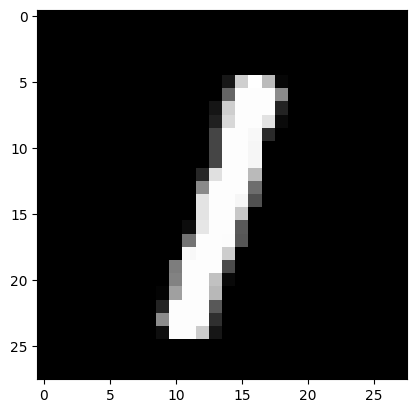

정답: 1
예측: 1


In [36]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy: {:.4f}'.format(accuracy.item()))

    r = random.randint(0, len(mnist_test)-1)
    single_test_x = mnist_test.test_data[r].view(-1,28*28).float().to(device)
    single_test_y = mnist_test.test_labels[r].to(device)

    prediction = model(single_test_x)
    pred_result = torch.argmax(prediction, 1).item()

    plt.imshow(mnist_test.test_data[r].squeeze(), cmap='gray', interpolation='nearest')
    plt.show()
    print('정답: {}'.format(single_test_y))
    print('예측: {}'.format(pred_result))